In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV, LogisticRegressionCV, LinearRegression, RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Question 1. Regularization (33 points)
In this problem, you build a set of different models to classify different forest types based on their spectral
characteristics at visible-to-near infrared wavelengths observed by ASTER satellite imagery over a forest
area in Ibaraki Prefecture, Japan (36° 57 N, 140° 38 E). The training data can be found in “training.csv”
and test data can be found in “testing.csv”.
Attribute Information:

**4 classes:**
* 's' ('Sugi' forest)
* 'h' ('Hinoki' forest)
* 'd' ('Mixed deciduous' forest)
* 'o' ('Other' non-forest land)

**27 features:**
* b1 - b9: ASTER image bands containing spectral information in the green, red, and near infrared
wavelengths for three days (Sept. 26, 2010; March 19, 2011; May 08, 2011).

* pred_minus_obs_S_b1 - pred_minus_obs_S_b9: Predicted spectral values (based on spatial interpolation)
minus actual spectral values for the 's' class (b1-b9).

* pred_minus_obs_H_b1 - pred_minus_obs_H_b9: Predicted spectral values (based on spatial interpolation)
minus actual spectral values for the 'h' class (b1-b9).

## 1.) LOGISTIC REGRESSION
Run a multinomial logistic regression to classify different forest. Present the coefficients obtained.
Present the confusion matrix on the test set.

In [2]:
#read in the data
train = pd.read_csv('Q1_training.csv')
test = pd.read_csv('Q1_testing.csv')

In [3]:
train.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [4]:
test.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [5]:
#create a class mapper to convert target variable to integers
classes = ('s', 'h', 'd', 'o')
#encoder -  string class to integer
mapper = {x:pos for pos,x in enumerate(classes)}
#decoder - integer class to string
decoder = {pos:x for pos,x in enumerate(classes)}

In [6]:
# separate independent and dependent variables
X_train = train.iloc[:,1:].values
y_train = train.loc[:,'class'].apply(lambda x: mapper[x.strip()]).values

X_test = test.iloc[:, 1:].values
y_test = test.loc[:, 'class'].apply(lambda x: mapper[x.strip()]).values

In [7]:
#scale the train and test data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
#instantiate the classifier - turn off penalty to ensure no regularization
#set it to multinomial for multi class model
clf = LogisticRegression(penalty='none', random_state=42, max_iter=50_000, multi_class='multinomial', fit_intercept=True)

In [9]:
#fit the classifier with the training data
clf.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50000,
                   multi_class='multinomial', n_jobs=None, penalty='none',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
#predict on train and test set
pred_train = clf.predict(X_train_scaled)
pred_test = clf.predict(X_test_scaled)

In [11]:
#make confusion matrices
confusion_train = confusion_matrix(y_train, pred_train)
confusion_test = confusion_matrix(y_test, pred_test)

#get accuracy scores
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)

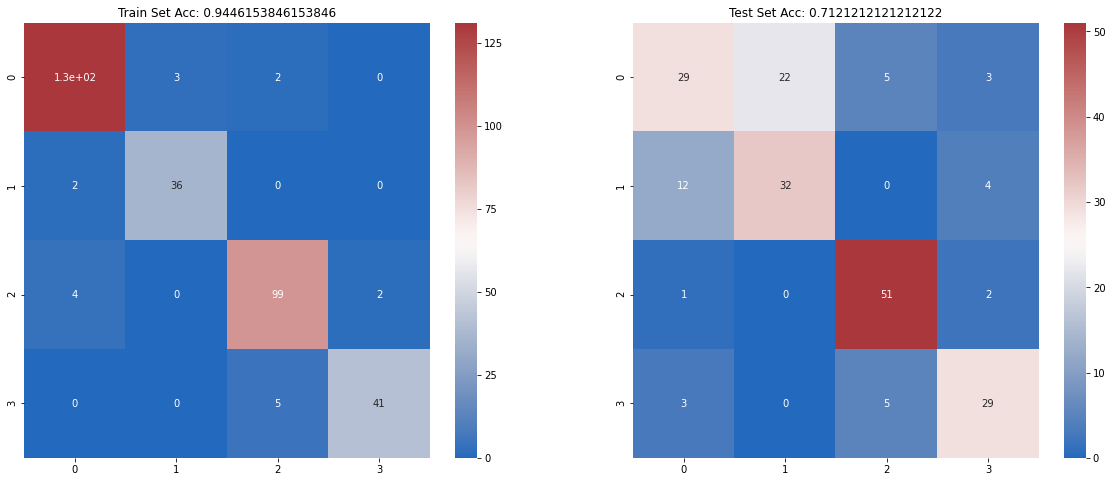

In [12]:
plt.subplots(nrows=1, ncols=2, figsize=(20,8))
plt.subplot(121)
sns.heatmap(confusion_train, annot=True, cmap='vlag')
plt.title('Train Set Acc: {}'.format(acc_train))
plt.subplot(122)
sns.heatmap(confusion_test, annot=True, cmap='vlag')
plt.title('Test Set Acc: {}'.format(acc_test))
plt.show()

In [13]:
#coefficients (rows = features, columns = Class)
pd.DataFrame(clf.coef_.T).rename(columns=decoder)

,s,h,d,o
0,22.224101,-1.302074,-8.258062,-12.663966
1,52.363167,77.870134,-50.755042,-79.478259
2,-37.773756,-48.202318,30.328013,55.648060
3,-4.028496,-3.922334,3.051031,4.899798
4,-382.051600,-117.486297,151.175764,348.362133
5,168.678234,6.637064,-37.272095,-138.043204
6,-21.475885,8.330583,0.967618,12.177684
7,117.919863,-26.546668,-17.443479,-73.929716
8,-145.021416,-41.425883,53.259859,133.187440
9,19.831919,-6.826307,-3.046437,-9.959175


## 2.) RIDGE LOGISTIC REGRESSION
Use ridge multinomial logistic regression to classify different forest. Explain why we use ridge
regression. Present the optimal tuning parameter obtained using cross-validation, the coefficients
for this parameter and the confusion matrix for the test set.

In [14]:
#search for hyperaramter from 0.0001 to 10 
alphas = np.linspace(0.0001, 10, 100)

#instantiate Ridge classifier
clf = RidgeClassifierCV(alphas=alphas, cv=5)

In [15]:
#fit the classifier with the training data
clf.fit(X_train_scaled, y_train)

RidgeClassifierCV(alphas=array([1.00000000e-04, 1.01109091e-01, 2.02118182e-01, 3.03127273e-01,
       4.04136364e-01, 5.05145455e-01, 6.06154545e-01, 7.07163636e-01,
       8.08172727e-01, 9.09181818e-01, 1.01019091e+00, 1.11120000e+00,
       1.21220909e+00, 1.31321818e+00, 1.41422727e+00, 1.51523636e+00,
       1.61624545e+00, 1.71725455e+00, 1.81826364e+00, 1.91927273e+00,
       2.02028182e+00, 2.1...
       8.08082727e+00, 8.18183636e+00, 8.28284545e+00, 8.38385455e+00,
       8.48486364e+00, 8.58587273e+00, 8.68688182e+00, 8.78789091e+00,
       8.88890000e+00, 8.98990909e+00, 9.09091818e+00, 9.19192727e+00,
       9.29293636e+00, 9.39394545e+00, 9.49495455e+00, 9.59596364e+00,
       9.69697273e+00, 9.79798182e+00, 9.89899091e+00, 1.00000000e+01]),
                  class_weight=None, cv=5, fit_intercept=True, normalize=False,
                  scoring=None, store_cv_values=False)

In [16]:
#get the best paramter and retrain model using all training observations with best parameter
best_alpha = clf.alpha_

clf = RidgeClassifier(alpha=best_alpha, max_iter=50_000, random_state=42)
clf.fit(X_train_scaled,y_train)

RidgeClassifier(alpha=2.626336363636364, class_weight=None, copy_X=True,
                fit_intercept=True, max_iter=50000, normalize=False,
                random_state=42, solver='auto', tol=0.001)

In [17]:
#predict on train and test set
pred_train = clf.predict(X_train_scaled)
pred_test = clf.predict(X_test_scaled)

In [18]:
#make confusion matrices
confusion_train = confusion_matrix(y_train, pred_train)
confusion_test = confusion_matrix(y_test, pred_test)

#get accuracy scores
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)

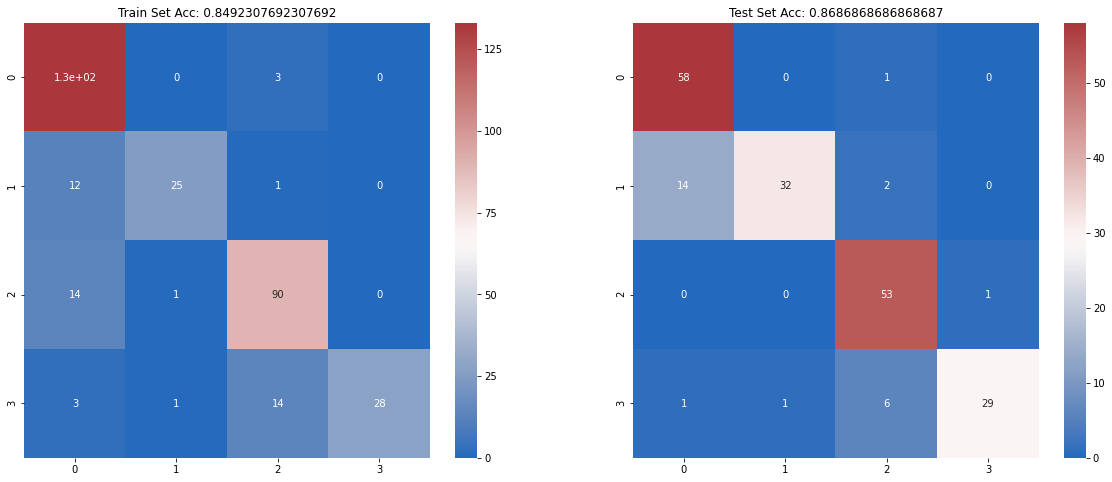

In [19]:
plt.subplots(nrows=1, ncols=2, figsize=(20,8))
plt.subplot(121)
sns.heatmap(confusion_train, annot=True, cmap='vlag')
plt.title('Train Set Acc: {}'.format(acc_train))
plt.subplot(122)
sns.heatmap(confusion_test, annot=True, cmap='vlag')
plt.title('Test Set Acc: {}'.format(acc_test))
plt.show()

In [20]:
#coefficients (rows = features, columns = Class)
pd.DataFrame(clf.coef_.T).rename(columns = decoder)

,s,h,d,o
0,0.376167,0.026852,-0.359376,-0.043643
1,0.318479,-0.347377,-0.095102,0.124000
2,0.250846,-0.065822,-0.108316,-0.076707
3,-0.315205,0.216851,-0.016188,0.114541
4,-0.044972,-0.045038,0.047629,0.042380
5,0.208850,-0.301712,0.217241,-0.124379
6,-0.218114,0.046421,0.271023,-0.099330
7,-0.212579,-0.011921,0.209987,0.014514
8,0.066341,-0.021506,-0.239206,0.194370
9,0.148362,-0.247497,0.130183,-0.031047


In [21]:
print('Optimal tuning parameter: {}\nSklearn interprets this value as 1/alpha in other models - 1/C: {}'.format(clf.alpha, (1/clf.alpha)))

Optimal tuning parameter: 2.626336363636364
Sklearn interprets this value as 1/alpha in other models - 1/C: 0.3807585402409855


#### Why Ridge?
We use Ridge regression to prevent training a model that is of high variance. A high variance model is one in which the learned parameters reflect the trends in the training data plus the randomness that is also inherit in the training data. Therefore it fails to generalize to unseen data. We see this in part 1.) where the training accuracy is 94% but the test data acccuracy is only 71%. After applying Ridge regression in this step we can see that the training accuracy has dropped to 85% but the test accuracy has jumped to 86% - meaning we have improved the model's capability to generalize

## 3.) LASSO LOGISTIC REGRESSION
Use lasso multinomial logistic regression to classify different forest. Explain why we use lasso.
Present the optimal tuning parameter obtained using cross-validation, the coefficients for this
parameter and the confusion matrix on the test set.

In [22]:
#search for hyperaramter from 0.0001 to 10 
alphas = np.linspace(0.0001, 10, 100)

#instantiate Lasso classifier by setting penalty to L1 and solver to saga and class to mulitnomial
clf = LogisticRegressionCV(penalty='l1', solver='saga', Cs=alphas, cv=5, max_iter=50_000, random_state=42, multi_class='multinomial')

In [23]:
#fit the classifier with the training data
clf.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=array([1.00000000e-04, 1.01109091e-01, 2.02118182e-01, 3.03127273e-01,
       4.04136364e-01, 5.05145455e-01, 6.06154545e-01, 7.07163636e-01,
       8.08172727e-01, 9.09181818e-01, 1.01019091e+00, 1.11120000e+00,
       1.21220909e+00, 1.31321818e+00, 1.41422727e+00, 1.51523636e+00,
       1.61624545e+00, 1.71725455e+00, 1.81826364e+00, 1.91927273e+00,
       2.02028182e+00, 2.12...
       9.29293636e+00, 9.39394545e+00, 9.49495455e+00, 9.59596364e+00,
       9.69697273e+00, 9.79798182e+00, 9.89899091e+00, 1.00000000e+01]),
                     class_weight=None, cv=5, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=50000,
                     multi_class='multinomial', n_jobs=None, penalty='l1',
                     random_state=42, refit=True, scoring=None, solver='saga',
                     tol=0.0001, verbose=0)

In [24]:
#get the best paramter and retrain model using all training observations with best parameter
best_C = clf.C_[0]

clf = LogisticRegression(C=best_C, penalty='l1', solver='saga', multi_class='multinomial', max_iter=50_000, random_state=42)
clf.fit(X_train_scaled,y_train)

LogisticRegression(C=0.5051454545454546, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=50000, multi_class='multinomial', n_jobs=None,
                   penalty='l1', random_state=42, solver='saga', tol=0.0001,
                   verbose=0, warm_start=False)

In [25]:
#predict on train and test set
pred_train = clf.predict(X_train_scaled)
pred_test = clf.predict(X_test_scaled)

In [26]:
#make confusion matrices
confusion_train = confusion_matrix(y_train, pred_train)
confusion_test = confusion_matrix(y_test, pred_test)

#get accuracy scores
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)

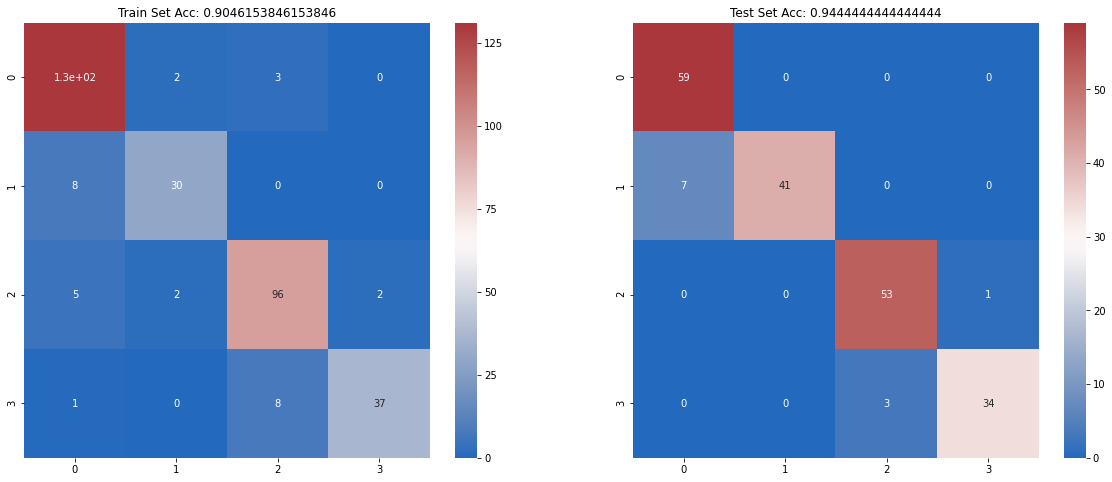

In [27]:
plt.subplots(nrows=1, ncols=2, figsize=(20,8))
plt.subplot(121)
sns.heatmap(confusion_train, annot=True, cmap='vlag')
plt.title('Train Set Acc: {}'.format(acc_train))
plt.subplot(122)
sns.heatmap(confusion_test, annot=True, cmap='vlag')
plt.title('Test Set Acc: {}'.format(acc_test))
plt.show()

In [28]:
#coefficients (rows = features, columns = Class)
pd.DataFrame(clf.coef_.T).rename(columns=decoder)

,s,h,d,o
0,1.145691,0.000000,-1.027796,0.000000
1,0.000000,-2.918075,0.000000,0.021869
2,0.000000,0.000000,0.000000,0.000000
3,-0.619734,0.864181,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.528908
5,0.000000,0.000000,0.000000,0.156077
6,0.000000,0.000000,1.241439,0.000000
7,0.000000,0.000000,0.000000,0.673786
8,0.000000,0.000000,0.000000,0.982671
9,0.000000,-2.122027,0.000000,0.000000


In [29]:
print('Optimal tuning parameter: {}'.format(clf.C))

Optimal tuning parameter: 0.5051454545454546


#### Why Lasso?
We use lasso for feature importance and dimensionality reduction. The original input to the model had 27 features plus bias term (28 total features). That is a high dimensional complex model. By utilizing Lasso regularization, we are able to identify those parameters that bear no consequence to the dependent variable and set their coefficient to 0. This reduces dimensionality and therefore reduces complexity. For example, in the coefficients presented above, for class 3, we went from a 27 dimensional model to a 8 dimensional model by applying Lasso and removing the non important features. In doing so, we have increased model to performance to 90% and 94% accuracy for the train and test sets respectively

## 4.) ADAPTIVE LOGISTIC REGRESSION
Use adaptive lasso multinomial logistic regression to classify different forest. Explain why we use
adaptive lasso regression. Present the optimal tuning parameter obtained using cross-validation, the
coefficients for this parameter and the confusion matrix on the test set.

In [30]:
#according to docs this library only works with py3 and linux for those who want to run this code
#also need lib fortran
# sudo apt-get install libgfortran3

from glmnet_python import cvglmnet, glmnet, glmnetCoef, glmnetPlot, glmnetPredict
import scipy as sp

In [31]:
gamma = 2

In [32]:
#get coeffs from Logistic Regression
lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

b_lr = lr_clf.coef_

In [33]:
#get best coeff from Ridge CV by using best tunning param from RidgeCV
#search for hyperaramter from 0.0001 to 10 
alphas = np.linspace(0.0001, 10, 100)

#instantiate Ridge CV classifier
ridge_clfcv = RidgeClassifierCV(alphas=alphas, cv=5)
ridge_clfcv.fit(X_train_scaled, y_train)

#get best tuning param
l_ridge = ridge_clfcv.alpha_

#get best coeff from Ridge
ridge_clf = RidgeClassifier(alpha=l_ridge, max_iter=50_000, random_state=42)
ridge_clf.fit(X_train_scaled, y_train)

b_ridge = ridge_clf.coef_

In [34]:
#w1 and w2
w1 = sp.float64([1/np.abs(x)**gamma for x in b_lr])
w2 = sp.float64([1/np.abs(x)**gamma for x in b_ridge])

In [35]:
#find best lambdas for each model
alasso1 = cvglmnet(x=X_train_scaled.copy().astype(sp.float64), y=y_train.copy().astype(sp.float64), family='multinomial', alpha=1, standardize=False, penalty_factor=w1.copy(), mtype='grouped')
alasso2 = cvglmnet(x=X_train_scaled.copy().astype(sp.float64), y=y_train.copy().astype(sp.float64), family='multinomial', alpha=1, standardize=False, penalty_factor=w2.copy(), mtype='grouped')

#lambda 1 and lambda2
lambda1 = alasso1['lambda_min']
lambda2 = alasso2['lambda_min']

In [36]:
#fit lasso models 
alasso1 = glmnet(x=X_train_scaled.copy().astype(sp.float64), y=y_train.copy().astype(sp.float64), family='multinomial', alpha=1, penalty_factor=sp.float64(w1.copy()), mtype='grouped')
alasso2 = glmnet(x=X_train_scaled.copy().astype(sp.float64), y=y_train.copy().astype(sp.float64), family='multinomial', alpha=1, penalty_factor=sp.float64(w2.copy()), mtype='grouped')

In [37]:
#predict using the fitted models and the optimal lambdas found in cross validation
#logistic regression weight penalties
pred_train1 = glmnetPredict(alasso1, newx=X_train_scaled.copy().astype(sp.float64), ptype='class',s=lambda1)
pred_train2 = glmnetPredict(alasso2, newx=X_train_scaled.copy().astype(sp.float64), ptype='class',s=lambda2)

#ridge regression weight penalties
pred_test1 = glmnetPredict(alasso1, newx=X_test_scaled.copy().astype(sp.float64), ptype='class',s=lambda1)
pred_test2 = glmnetPredict(alasso2, newx=X_test_scaled.copy().astype(sp.float64), ptype='class',s=lambda2)

In [38]:
#make confusion matrices
confusion_train1 = confusion_matrix(y_train, pred_train1)
confusion_train2 = confusion_matrix(y_train, pred_train2)

confusion_test1 = confusion_matrix(y_test, pred_test1)
confusion_test2 = confusion_matrix(y_test, pred_test2)

#get accuracy scores
acc_train1 = accuracy_score(y_train, pred_train1)
acc_train2 = accuracy_score(y_train, pred_train2)

acc_test1 = accuracy_score(y_test, pred_test1)
acc_test2 = accuracy_score(y_test, pred_test2)

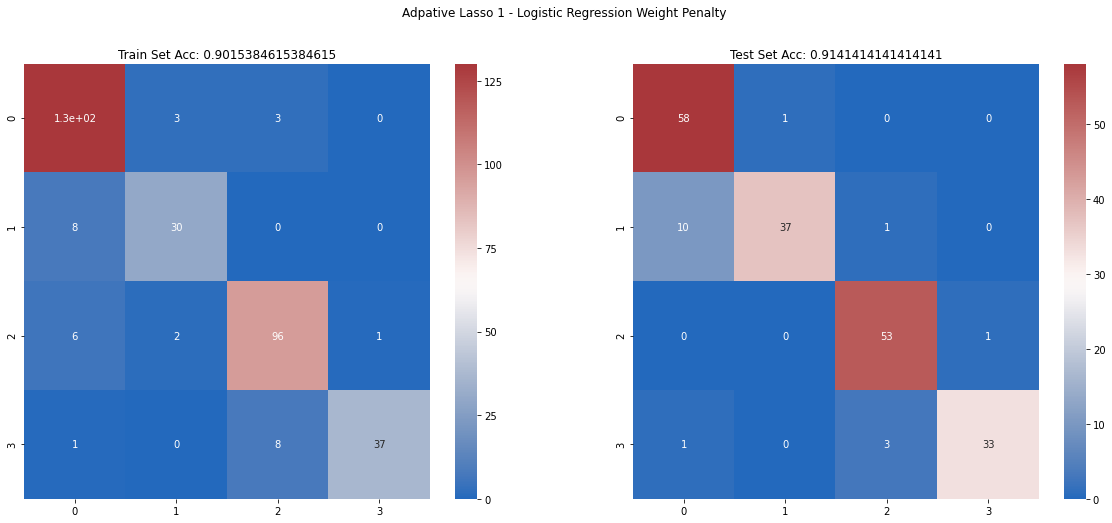

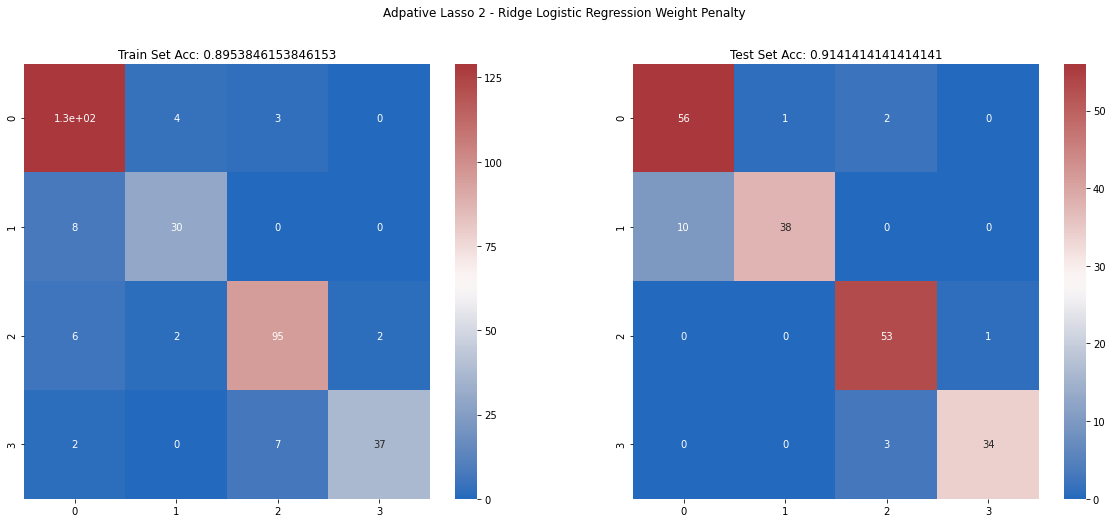

In [39]:
plt.subplots(nrows=2, ncols=2, figsize=(20,8))
plt.subplot(121)
sns.heatmap(confusion_train1, annot=True, cmap='vlag')
plt.title('Train Set Acc: {}'.format(acc_train1))
plt.subplot(122)
sns.heatmap(confusion_test1, annot=True, cmap='vlag')
plt.title('Test Set Acc: {}'.format(acc_test1))
plt.suptitle('Adpative Lasso 1 - Logistic Regression Weight Penalty')
plt.show()

plt.subplots(nrows=1, ncols=2, figsize=(20,8))
plt.subplot(121)
sns.heatmap(confusion_train2, annot=True, cmap='vlag')
plt.title('Train Set Acc: {}'.format(acc_train2))
plt.subplot(122)
sns.heatmap(confusion_test2, annot=True, cmap='vlag')
plt.title('Test Set Acc: {}'.format(acc_test2))
plt.suptitle('Adpative Lasso 2 - Ridge Logistic Regression Weight Penalty')
plt.show()

In [40]:
from IPython.display import display_html

df1 = pd.DataFrame(np.array(glmnetCoef(alasso1, s=lambda1))[:,:,0].T).rename(columns=decoder)
df2 = pd.DataFrame(np.array(glmnetCoef(alasso2, s=lambda2))[:,:,0].T).rename(columns=decoder)


df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Logistic Regression Adaptive Lasso Weights')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Ridge Logistic Regression Adaptive Lasso Weights')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,s,h,d,o
0,0.934124,-3.29815,1.80553,0.558501
1,1.00466,2.58172,-1.84112,-1.00466
2,0,0,0.0543612,0
3,-2.92422,-2.84993,3.20689,2.84993
4,0,0,0,0
5,0,0,0,0
6,0,-1.16126,0,0.714771
7,-0.212585,0,1.32696,0
8,0,-2.79517,0,0.445268
9,0,0,0,0


In [41]:
print('Best lambda LR Adaptive: {}\nBest lambda Ridgde Adaptive: {}'.format(lambda1[0], lambda2[0]))

Best lambda LR Adaptive: 0.14344714715106677
Best lambda Ridgde Adaptive: 0.08312375690553696


#### Why Adaptive?
Adaptive LASSO is said to have the oracle property where an oracle estimator has both consistent parameter estimation and variable selection. When using simple LASSO, the shrinkage parameter must be larger for selection than for prediction. Also large nonzero parameters will be too small so that bias ends up being too large. Thus LASSO is only consistent for variable selection nder some conditions on the shrinkage parameters. Therefore Aapative LASSO acts as a "secondary stage" of estimation which helps control the bais of LASSO estimates. 

## 5.)
Which model you select? Why?

**<u>Answer</u>**

Adaptive LASSO effectively handled the bis/variance trade off while reducing overall model complexity. It also achieved the highest accuracy on the test set without the need for intermediate steps (as required in Adaptive LASSO). Therefore Adaptive LASSO is the winner